<a href="https://colab.research.google.com/github/cstecker/comparative_politics/blob/main/01%20-%20In%20welcher%20Blase%20bin%20ich%20hier%20eigentlich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **In welcher Blase bin ich hier eigentlich?**
Nun wollen wir mit den ersten Analysen loslegen. Am besten schauen wir uns erstmal die Damen und Herren etwas genauer an, die mit uns im Kurs sitzen. Genau genommen schauen wir uns die Damen und Herren an, die die Vorlesung im Sommersemester 2022 besucht haben. Damals wurde die Umfrage in einer Vorlesung hier an der TU Darmstadt durchgeführt.

Dazu laden wir die (bereits aufbereiteten) Daten der Umfrage direkt über GitHub herunter.

**Den gesamten folgenden Code können Sie nun fortlaufend in den *Code Editor* tippen und ausführen.** Mit *Strg+Enter* oder durch das klicken des Play-Buttons können Sie den Code passagenweise ausführen. Darunter sehen Sie dann jeweils, welche Zeilen, mit welchem Ergebnis ausgeführt wurden. Da man sich so die Befehle besser einprägt, empfiehlt es sich übrigens tatsächlich zu tippen und nicht einfach nur zu kopieren.

Jetzt laden wir das Paket *tidyverse*. Pakete (bzw. packages) sind Baukästen an Befehlen, die Base R erweitern. Das tidyverse ist eine ganze Sammlung von Paketen, die insbesondere von Hadley Wickham, einem Superhelden im R-Universum, geprägt wurden. Sie machen das Arbeiten mit R sehr intuitiv und vielseitig.

Beim ersten Mal müssen wir das tidyverse installieren, beim nächsten Mal nicht mehr.

In [ ]:
# Pakete laden ------------------------------------------------------------
install.packages("tidyverse") #nur beim ersten Mal notwendig, danach reicht "library"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



R gibt einige Meldungen aus, die uns zunächst nicht weiter kümmern müssen. (Wenn Sie hier in dem eingegrauten Bereich Zeilen sehen, die mit “##” beginnen, handelt es sich dabei jeweils um Ausgaben, die auf einem Befehl folgen.)

Wir können mit dem Befehl *library()* nun das Paket tidyverse laden.

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Anschließend laden wir den Datensatz der Kursumfrage. Die anonyme Kursumfrage wurde von Ihnen vor dem Start der Vorlesung durchgeführt und gibt Ihnen die schöne Möglichkeit einer sozialforscherischen Selbstbeschauung.

In [ ]:
# Daten laden -------------------------------------------------------------
survey <- readRDS(gzcon(url("https://github.com/cstecker/comparative_politics/blob/main/vpw2022-04.rds?raw=true")))

R sucht ausgehend vom aktuellen Pfad nach der Datei auf GitHub.
Für einen ersten Blick auf die Daten geben wir ein:

In [ ]:
glimpse(survey)

Rows: 88
Columns: 39
$ time             <dttm> 2022-04-05 14:21:38, 2022-04-05 14:38:20, 2022-04-05…
$ geschlecht       <fct> Männlich, Keine Angabe, Männlich, Männlich, Männlich,…
$ bundesland       <fct> Hessen, Ich wurde nicht in Deutschland geboren, Baden…
$ skalo_cdu        <fct> 4, -5, -4, -4, 3, 3, -3, 0, -5, -4, -3, 1, -2, -5, 1,…
$ skalo_spd        <fct> 2, -5, -4, -1, 1, 3, 0, -2, 5, 4, 3, 1, 2, 2, 2, 3, 3…
$ skalo_pds        <fct> 4, -5, -4, 2, -5, 2, -3, 0, 1, -2, -2, 2, -3, -2, -4,…
$ skalo_gru        <fct> 5, -5, -4, 4, -5, 2, 3, -2, 4, 3, 0, 3, 2, 5, 1, 1, 3…
$ skalo_fdp        <fct> -4, -5, -4, -3, -5, 2, 0, 2, 3, -1, 5, 0, 1, -1, 4, 5…
$ skalo_afd        <fct> -5, -5, -4, -5, -5, 0, -5, 4, -5, -5, -5, -4, -5, -5,…
$ vote             <chr> "Bündnis90 / Die Grünen", "Sonstiges:", "CDU", "Bündn…
$ vote_text        <chr> "", "XYZ", "", "", "", "", "", "", "", "", "FDP", "",…
$ lire_self        <fct> 1, NA, 4, 2, 8, 7, 4, 7, 3, 3, 5, 4, 4, 3, 5, 6, 3, 3…
$ econ_self        

Wir erhalten nun eine Auflistung aller Variablen mit weiteren Informationen. In der linken Spalte sehen wir die Variablen des Datensatzes. Jeweils rechts daneben steht eine kleine Übersicht über die Antworten der Studierenden. 

An der Umfrage haben sich Studierende aus mehreren Bundesländern beteiligt. Wie häufig sind die einzelnen Bundesländer vertreten? Dazu lassen wir uns die Anzahl der Fälle innerhalb einer bestimmten Gruppe (Bundesländer) mit count ausgeben.

In [ ]:
count(survey, bundesland)

bundesland,n
<fct>,<int>
Baden-Württemberg,8
Bayern,4
Hessen,53
Niedersachsen,2
Nordrhein-Westfalen,3
Rheinland-Pfalz,10
Sachsen-Anhalt,1
Ich wurde nicht in Deutschland geboren,7


Versuchen Sie *count* mal selbst, z. B. mit der Variable *geschlecht*!

Wir interessieren uns nun zunächst für Studierende aus Hessen. Dazu werfen wir alle anderen Studierenden aus dem Datensatz – ich sagte Ihnen ja, mit R ist man sehr mächtig. In R (bzw. dem tidyverse) heißt das filtern.

In [ ]:
sample_hes <- filter(survey, bundesland == "Hessen")

Nun ist ein neues Objekt sample_hes angelegt, das nur Hessen enthält (analog können Sie auch ein *sample_ber* etc. anlegen). Mit *filter* haben Sie das erste Verb kennen gelernt, mit dem man die Daten bearbeiten kann (auch als data wrangling bezeichnet).

## **Wie würden die Kursteilnehmer abstimmen, wenn am nächsten Sonntag Bundestagswahl wäre?**

Nun sind wir neugierig, welche Parteien von den Hessenern präferiert werden. Diese Information ist in der Variable vote hinterlegt:

In [ ]:
count(sample_hes, vote)

vote,n
<chr>,<int>
AfD,1
Bündnis90 / Die Grünen,21
CDU,6
Die Linke,4
FDP,4
Ich würde nicht wählen,1
SPD,13
Sonstiges:,1
Volt,2


Hoppla, offenkundig sind wir hier in einer ziemlich links-liberalen Blase gelandet. Ein Blick auf aktuelle Umfragen legt nahe, dass der durchschnittliche Bundesbürger politisch anders tickt als Sie und Ihre Kommillitoninnen und Kommillitonen.

Aber auch, wenn Sie zu den wenigen Konservativen im Kurs gehören, brauchen Sie sich keine Sorgen zu machen. Zum Glück respektieren sicher gerade an der Universität alle den fundamentalen Wert der Meinungsfreiheit und werden auch abweichenden Argumenten und Werthaltungen gegenüber respektvoll und aufgeschlossen sein. Sie brauchen auch nicht aus Höflichkeit über die politisch korrekten linksgrünen Scherze des Dozenten lachen. Er hat halt Marktforschung betrieben (Kursumfrage!) und will sich bei der Mehrheit anbiedern.

Wie sieht es denn in Rheinland-Pfalz aus?

In [ ]:
survey %>% 
  filter(bundesland == "Rheinland-Pfalz") %>% 
  count(vote)

vote,n
<chr>,<int>
AfD,1
Bündnis90 / Die Grünen,5
Die Linke,2
FDP,1
SPD,1


Die letzte Eingabe besteht aus mehreren Zeilen, die durch “%>%” verbunden sind. Dies ist eine sogenannte pipe, die Befehle verknüpft. Die pipe nimmt jeweils den Output der vorhergehenden Zeile als Input der nachfolgenden Zeile, hier: Nimm Dir den survey-Datensatz, dann filtere Studierende aus Rheilnad-Pfalz heraus, dann zähle ihre Parteipräferenzen. Wir werden die pipe nun immer nutzen, da man damit komplexe Befehlsketten sehr übersichtlich strukturieren kann. Damit Sie keinen Knoten in die Finger bekommen: Nutzen Sie *Strg+Shift+M*, um die pipe zu erzeugen. Überhaupt lohnt es sich die wichtigsten keyboard shortcuts drauf zu haben.

Die anderen Bundesländer sind vergleichsweise gering in den Daten vertreten. Daher können wir einfach aggregiert schauen, wie übrigen Studierenden so abgeschnitten haben. Dafür erstellen wir einen sogenannent *Vector* welcher so *c()* aussieht. Hierbei handelt es sich um ein Objekt, welches beliebig viele Elemente enthalten kann (Wörter, Zahlen...). Dann sagen wir dem Filter-Befehl mit *%in%*, dass er nach allen Bundesländern filtern soll, die sich in diesem Element befinden.

In [ ]:
survey %>% 
  filter(bundesland %in% c("Baden-Württemberg","Bayern","Niedersachsen","Nordrhein-Westfalen","Sachsen-Anhalt")) %>% 
  count(vote)

vote,n
<chr>,<int>
Bündnis90 / Die Grünen,8
CDU,2
Die Linke,1
FDP,2
SPD,3
Tierschutzpartei,1
Volt,1


Aufgrund der unterschiedlichen Teilnehmerzahlen, kann man schwer erkennen, ob es relevante Unterschiede zwischen den Bundesländern gibt. Da helfen Prozente.

In [ ]:
survey %>% 
  filter(bundesland == "Hessen") %>% 
  count(vote) %>% 
  # Berechnen der Prozentanteile mit mutate, die neuen Variablen nennen wir dann totalvotes und share
  mutate(totalvotes = sum(n),
         share = n/totalvotes*100)

vote,n,totalvotes,share
<chr>,<int>,<int>,<dbl>
AfD,1,53,1.886792
Bündnis90 / Die Grünen,21,53,39.622642
CDU,6,53,11.320755
Die Linke,4,53,7.547170
FDP,4,53,7.547170
Ich würde nicht wählen,1,53,1.886792
SPD,13,53,24.528302
Sonstiges:,1,53,1.886792
Volt,2,53,3.773585


Die Prozente haben wir mit *mutate* berechnet – dies ist das *tidyverse*-Verb zum Generieren neuer Variablen. Erst haben wir die totalvote berechnet. Dies ist die Gesamtzahl aller Stimmen. Mit einem Komma abgetrennt, haben wir eine weitere Variable, share erstellt, die uns die Prozente ausgibt. Und wir haben gleich noch gelernt, dass man Kommentare mit einem anführenden # in den Code schreiben kann. Kommentieren Sie am besten immer ausführlicher als Sie es im Moment für notwendig erachten. Dann schauen Sie in vierzehn Tagen weniger ratlos auf den Code, den Sie vor vierzehn Tagen selbst flüssig heruntergeschrieben hat. Sie können nun die Bundesländer vergleichen, indem Sie einfach *filter(bundesland == "Hessen")* beliebig befüllen.

Wenn Sie dies vertiefen wollen, lesen Sie sich dazu am besten auch das Kapitel in R for DataScience durch.

Zurück zu den Hessenern: Eine Grafik sagt es meist besser als eine Tabelle, da die Informationen unmittelbar visuell beurteilt werden können. Füttern wir die Parteipräferenzen also in ein Balkendiagramm:

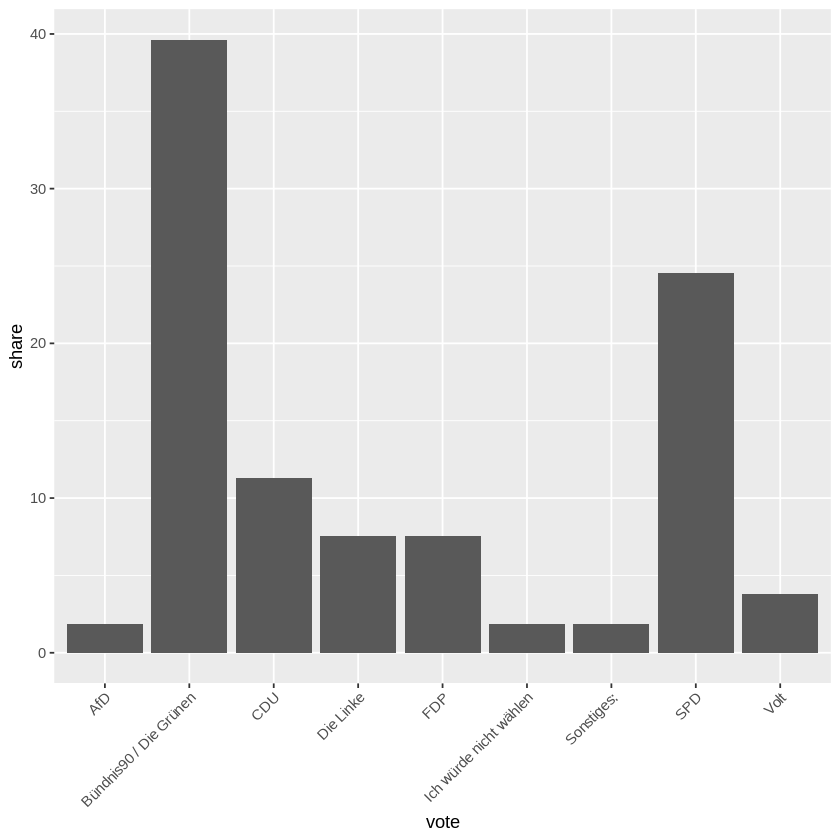

In [ ]:
sample_hes %>% count(vote) %>% #Wir wollen die Anzahl der votes pro Partei aus dem Datensatz für Hessen
  mutate(totalvotes = sum(n), #Wir erstellen erneut die Prozentvariable für diesen Datensatz
         share = n/totalvotes*100) %>% 
  ggplot() +
  geom_col(aes(x = vote, y = share)) + 
  scale_x_discrete(guide = guide_axis(angle = 45)) 

Mit dem Balkendiagramm haben wir ggplot2, das Visualisierungspaket im *tidyverse* kennengelernt. Mit “ggplot” wird der Grafikbefehl gestartet. Ab da weiß R, dass nun ggplot-Befehle kommen. Danach werden weitere ggplot-Befehle mit “+” verknüpft (Achtung: hier nicht “%>%” benutzen). Danach sagen wir R, welche Art des Graphs, das Geom, gezeichnet werden soll. Mit *geom_col* sagen wir R, dass die Daten als Balken (Columns) dargestellt werden sollen und konkretisieren in *(aes(x = vote, y = share))*, dass auf der x-Achse die unterschiedlichen Parteien und auf der y-Achse die Prozente bei der Sonntagsfrage abgebildet werden. Der letzte Abschnitt, *scale_x_discrete*, ist vorerst nicht wichtig zu verstehen, dient hier aber um die Namen der Parteien auf der x-Achse zu drehen, damit man sie besser zu lesen sind.

Lesen Sie sich dazu am besten auch das Kapitel in R for DataScience durch.

Nun können Sie die Stimmenanteile zwischen den Unis vergleichen. Schauen Sie sich doch auch mal an, wie die Verteilung bei den politischen Präferenzen aussieht. Dazu müssen Sie nur *vote* mit *lire_self* oder *immi_self* ersetzen. Wenn Sie unterschiedliche Unis betrachten wollen, pipen sie sich einfach eine entsprechende Befehlskette zusammen.

## **Wer in jungen Jahren nicht links ist, der hat kein Herz oder kommt aus Bayern.**

Jetzt lernen wir noch ein weiteres ggplot-geom kennen und nutzen dies gleich für eine Forschungsfrage.
Als SozialwissenschaftlerInnen sind wir ständig auf der Suche nach Mustern und Erklärungen der politischen und sozialen Realität. Da sich auch Studierende aus Bayern an der Kursumfrage beteiligt hat, sind wir in der glücklichen Lage, eine politikwissenschaftliche Großtheorie überprüfen zu können. Das folgende bekannte Diktum fasst diese prominente Theorie zusammen: “Wer in jungen Jahren nicht links ist, der hat kein Herz oder kommt aus Bayern.” 😉 Um diese Theorie überprüfen zu können, schauen wir, ob sich die Studierenden Bayern im “Links-Sein” von den Studierenden aus Hessen und Rheinland-Pfalz unterscheidet. In der Umfrage wurden Sie gebeten, sich auf einer allgemeinen “Links-Rechts-Achse” selbst einzuordnen. Diese Information ist in der Variablen lire_self hinterlegt. Die Verteilung der Variablen bilden wir nun mit einem density-plot ab und lassen uns die Werte für die Unis getrennt darstellen. Wenn die Theorie wahr wäre, sollten wir beobachten, dass die Bayerer eher rechte Werte auf der Skala wählen als Studierende der anderen Unis.

Um Bayern nun mit anderen Bundesländern vergleichen zu können, erstellen wir eine Variable in der Studierenden der Wert *Bayern* zugeordnet wird, wenn sie aus Bayern kommen und der Wert *Anderes" wenn nicht. Dafür eignet sich der *ifelse* Befehl, wie der Name schon vermuten lässt.

Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”


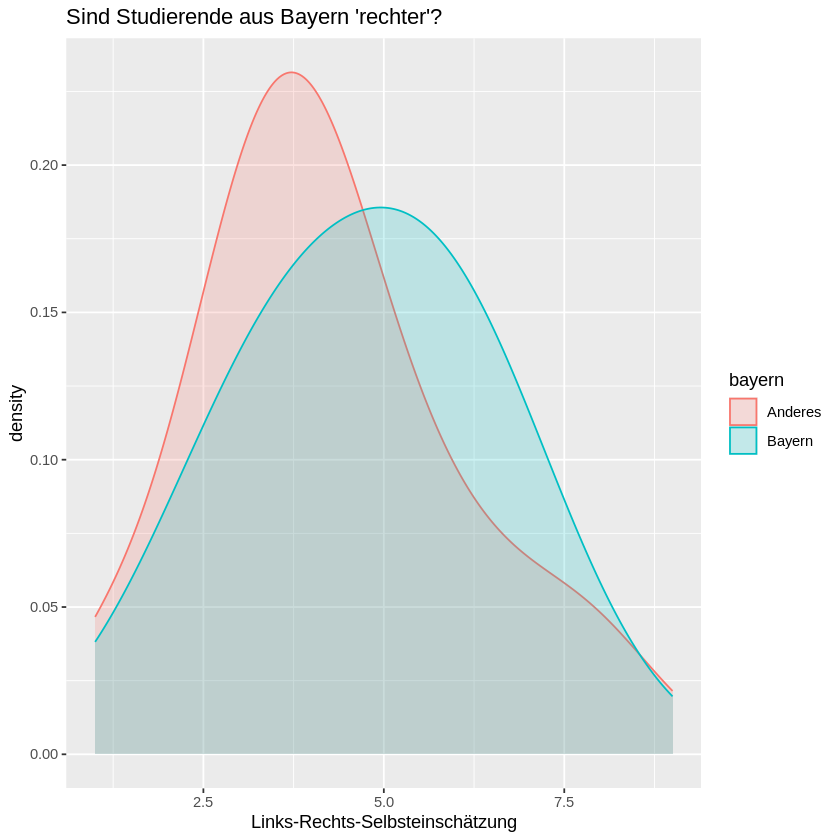

In [ ]:
survey %>% 
  mutate(bayern = ifelse(bundesland == "Bayern","Bayern","Anderes")) %>%
  ggplot(aes(as.numeric(as.character(lire_self)), color = bayern, fill = bayern)) +
  geom_density(alpha = 0.2, adjust = 1.5) +
  labs(title = "Sind Studierende aus Bayern 'rechter'?", 
       x = "Links-Rechts-Selbsteinschätzung") 

Und tatsächlich! Der Modus beider Verteilungen lässt eine Bestätigung unserer Erwartung vermuten. In Bayern scheinen die Positionen normalverteilt, währen sie in den anderen Bundeländern hingegen linkssteil sind. Aber vorsicht! Wenn wir uns die Daten erneut anschauen, dann sehen wir, dass nur vier Studierende aus Bayern kommen. Hängen diese Befunde also eventuell auch mit einer verzerrten Stichprobe zusammen? Damit sind wir schon mitten im Interview mit den Daten, die wir im Kurs einüben wollen.

Sie wissen jetzt auch, dass man mit *labs()* eine Abbildung und ihre Achsen beschriften kann. Im rechten unteren “plots & files”-pane sehen Sie Ihre Grafik. Speichern Sie diese über *Export/Save as Image* in ihren /graph-Ordner.

Eine umfangreichere Auswertung der Umfrage finden Sie hier:

???

Die Grafiken sind etwas schicker (haben aber auch deutlich mehr Zeit gekostet). Im Laufe des Kurses werden wir die Schönheit und Aussagekraft der Grafiken auch stetig verbessern.

## **Was sind Ihre eigenen theoretischen Erwartungen!**

Sind Frauen politisch “linker” als Männer? Welche Intuitionen über mögliche Datenmuster haben Sie?
Posten Sie ein Ergebnis im moodle-Forum Ihre Grafiken und Skripte im AppetizeR-Kurs. Am besten posten Sie den Code und das .png (aus ihrem “/graphs”-Ordner), damit wir nachvollziehen können, wie Sie zu ihren Ergebnissen kommen (Stichwort: reproducable research).